# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file

In [2]:
data=pd.read_csv('C:/Users/F/Downloads/180_408_bundle_archive/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Get information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Delete unnecessary columns

In [4]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Encoding categorical features

In [5]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
diagnosis={'M':1, 'B':0}
data['diagnosis']=data['diagnosis'].replace(diagnosis)
data['diagnosis'].unique()

array([1, 0], dtype=int64)

# Getting a some statistic about target feature

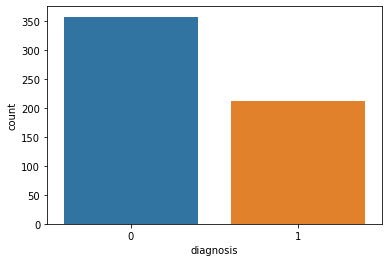

In [7]:
sns.countplot(data['diagnosis'])

# Calculating correlation in data

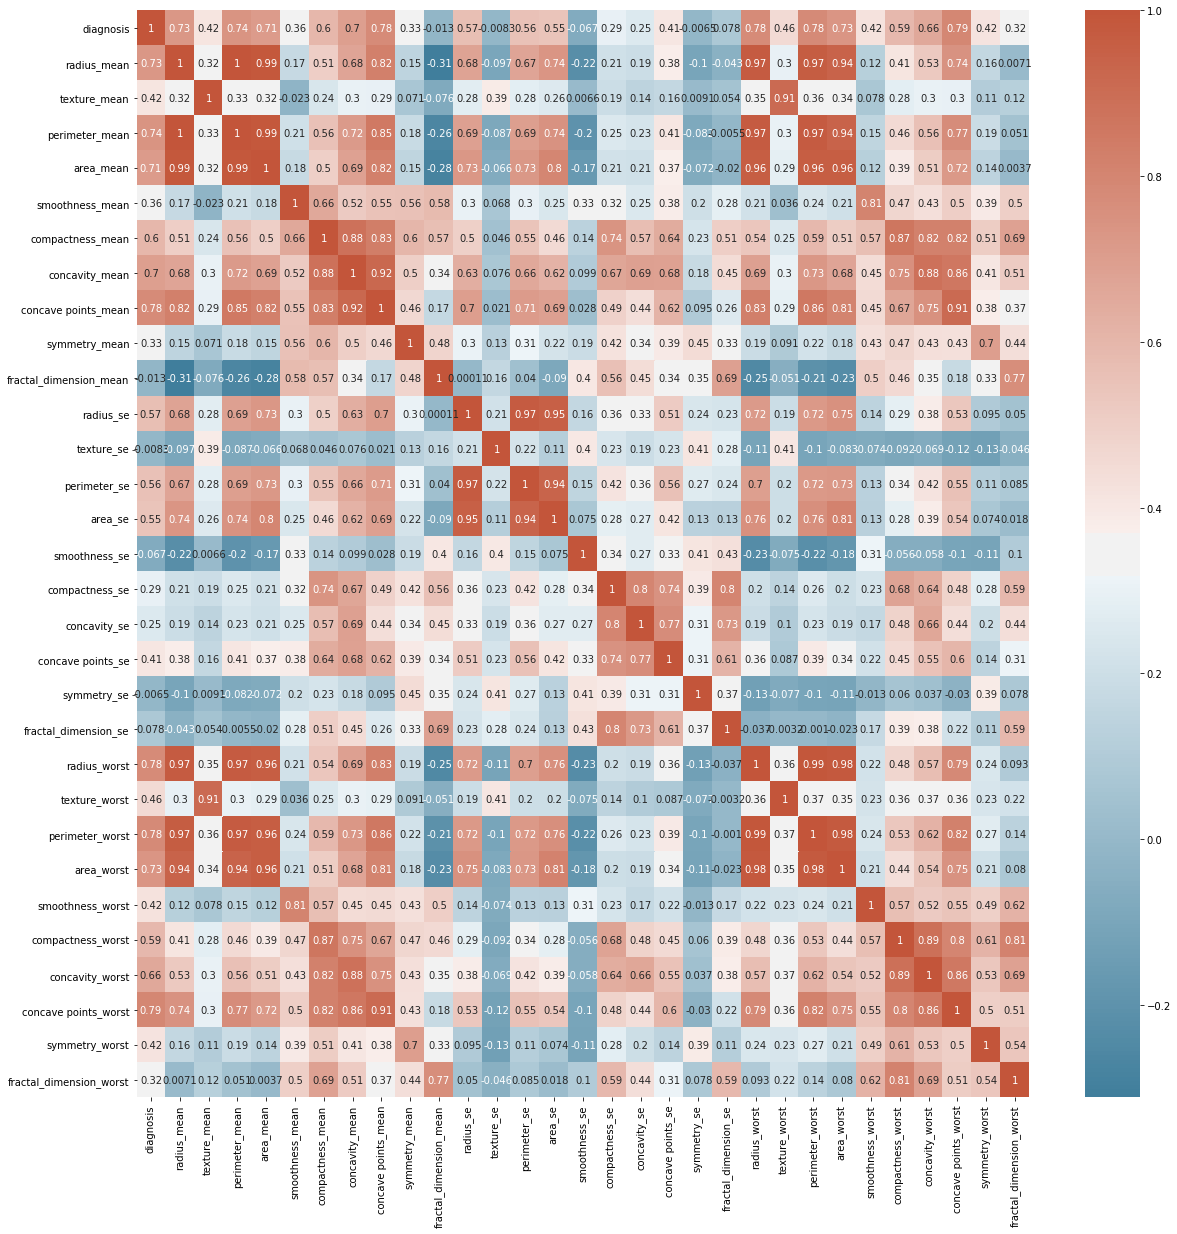

In [8]:
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap=cmap, ax=ax)

# Removing highly correlated features

In [9]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
data = data.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
data = data.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
data = data.drop(cols, axis=1)

# verify remaining columns
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

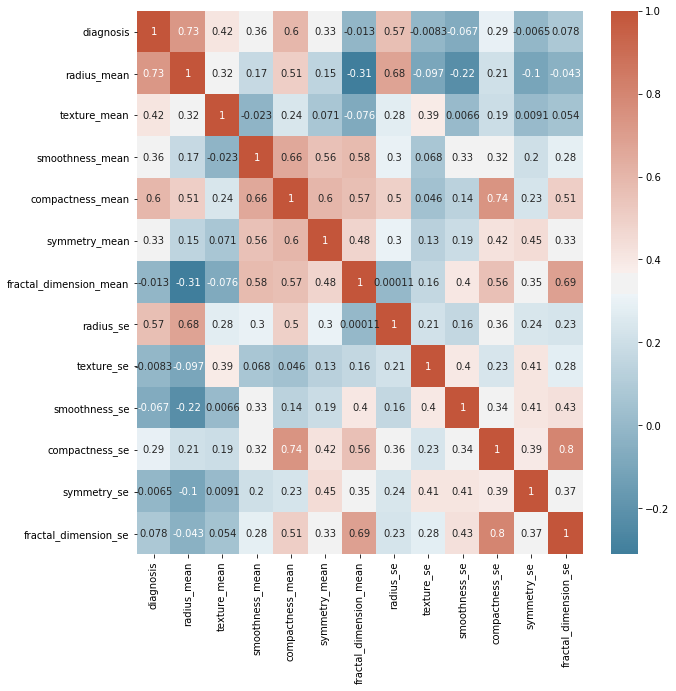

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap=cmap, ax=ax)

# Preparing data for training

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
y=data['diagnosis']
X=data.drop(['diagnosis'], axis=1)

In [12]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Creation a different types of model and comparison accuracy of different models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
LR_model=LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy = 0.9590643274853801


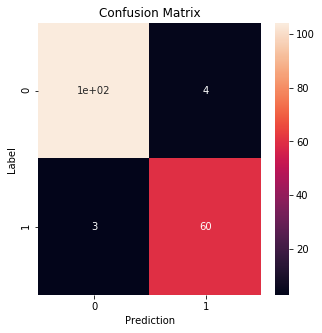

In [16]:
y_pred=LR_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix'); 

Accuracy = 0.9239766081871345


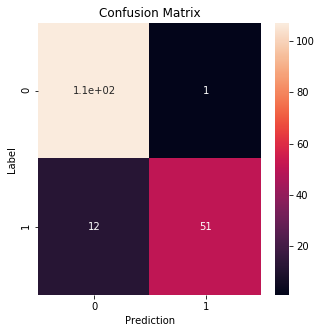

In [17]:
KNN_model=KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

Accuracy = 0.9649122807017544


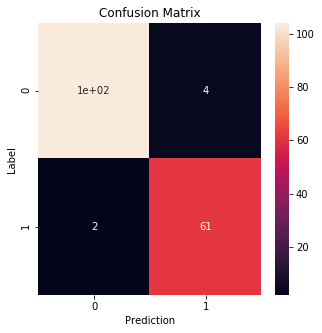

In [18]:
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

Accuracy = 0.847953216374269


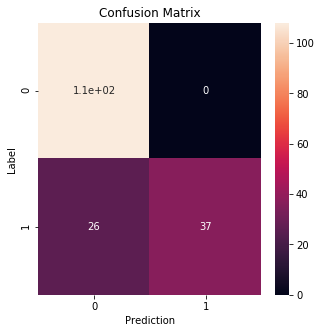

In [19]:
kernel_SVM_model = SVC(kernel = 'rbf', random_state = 0, C=0.5, gamma=0.5)
kernel_SVM_model.fit(X_train, y_train)
y_pred = kernel_SVM_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

Accuracy = 0.9005847953216374


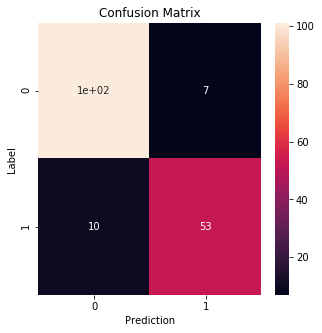

In [20]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)
y_pred = GaussianNB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

Accuracy = 0.9181286549707602


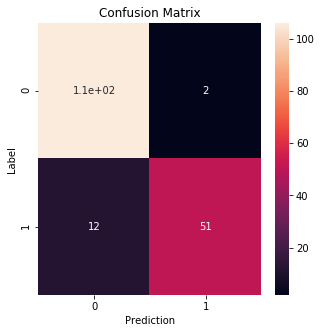

In [21]:
Decision_Tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3, min_samples_split=0.8)
Decision_Tree_model.fit(X_train, y_train)
y_pred = Decision_Tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

Accuracy = 0.9532163742690059


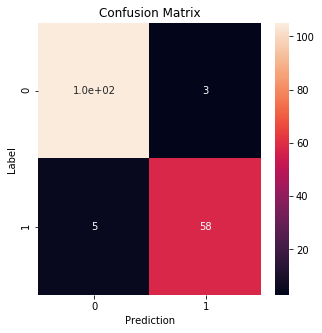

In [22]:
Random_Forest_model = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0, max_depth=5)
Random_Forest_model.fit(X_train, y_train)
y_pred = Random_Forest_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy = '+str(accuracy_score(y_test, y_pred)))

plt.subplots(figsize=(5,5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Prediction');ax.set_ylabel('Label'); 
ax.set_title('Confusion Matrix');

# We got maximum accuracy in the Support Vector Classifier model(96.4%)